In [1]:
# for automatic reloading
%load_ext autoreload
%autoreload 2

In [2]:
from birdbrain.atlas import atlas
from birdbrain.utils import um_to_vox
import numpy as np

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [3]:
from birdbrain.visualization.plotting_2d import plot_location_coordinates

In [4]:
dset_dir = '../../data/processed/starling/'

starling_atlas = atlas(
    dset_dir = dset_dir,
    um_mult = 100,
    smoothing = ['Brain', 'Brainregions']
)

qform_code 32 not valid; setting to 0
qform_code 32 not valid; setting to 0
qform_code 32 not valid; setting to 0
qform_code 32 not valid; setting to 0


Getting voxel data from .img files...


Loading brain labels...
Getting location for each nucleus/region from voxel data...


Atlas created


### Plot default location of y sinus 
- the atlas' y-sinus is around 1mm posterior to where our lab tends to consider y sinus and a few microns from the center

In [5]:
# initial location of y sinus
ysin_in_um = {"medial-lateral":0, "posterior-anterior":0, "ventral-dorsal":0}
# get the voxel location 
y_sin_in_vox = um_to_vox(starling_atlas.voxel_data.loc['Brain','affine'], ysin_in_um, starling_atlas.um_mult, starling_atlas.y_sinus_um_transform)
print(y_sin_in_vox)

{'medial-lateral': 126, 'posterior-anterior': 80, 'ventral-dorsal': 205}


/mnt/cube/tsainbur/Projects/github_repos/birdbrain/birdbrain/visualization/plotting_2d.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  atlas.label_cmap(cnorm(regions_plotted.label.values))


medial-lateral: -27.0um | posterior-anterior: -37.0um | ventral-dorsal: -12.0um


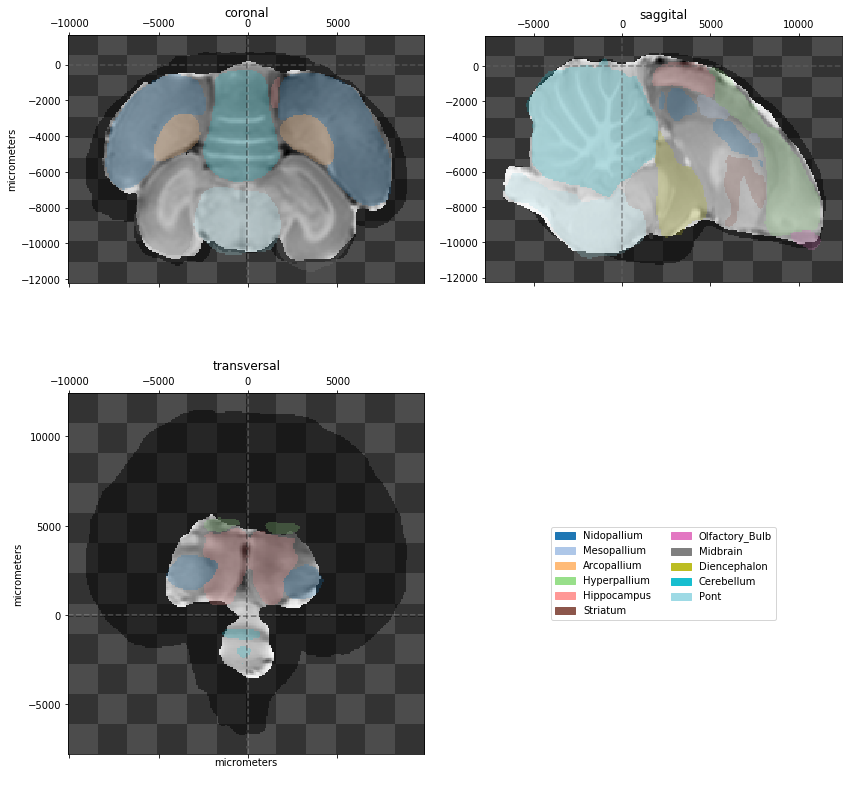

In [6]:
plot_location_coordinates(starling_atlas, y_sin_in_vox, "Brainregions", region_alpha = 0.25, zoom =6);

### propose an updated y-sinus

In [7]:
updated_y_sinus = {'medial-lateral': 128, 'posterior-anterior': 98, 'ventral-dorsal': 205}

medial-lateral: 143.0um | posterior-anterior: 1493.0um | ventral-dorsal: -12.0um


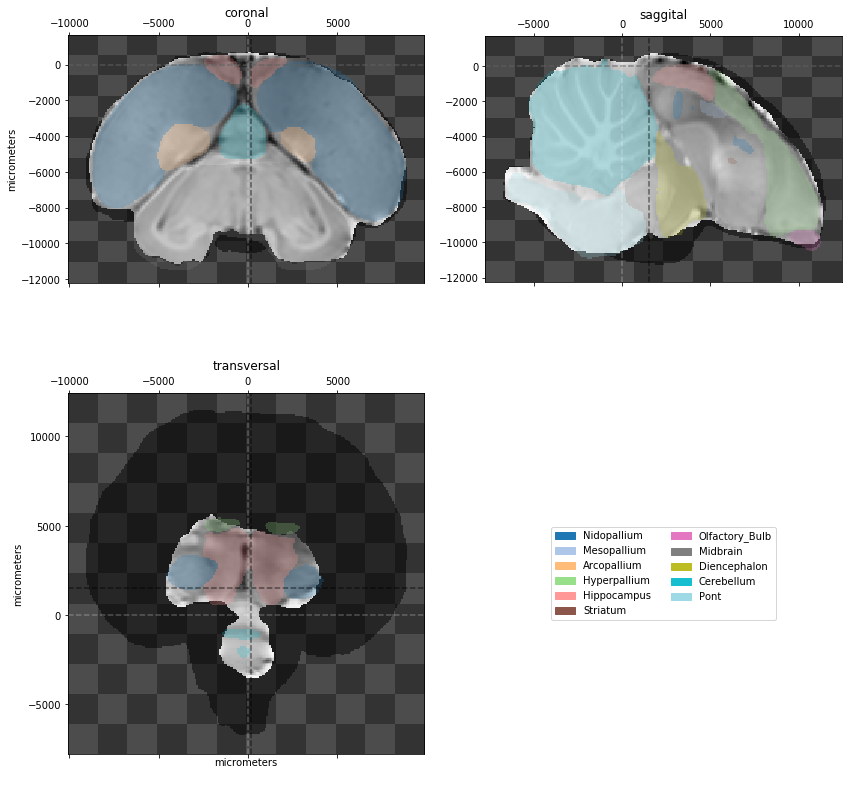

In [8]:
plot_location_coordinates(starling_atlas, updated_y_sinus, "Brainregions", region_alpha = 0.25, zoom =6);

### Update the y-sinus in atlas

medial-lateral: 143.0um | posterior-anterior: 1493.0um | ventral-dorsal: -12.0um


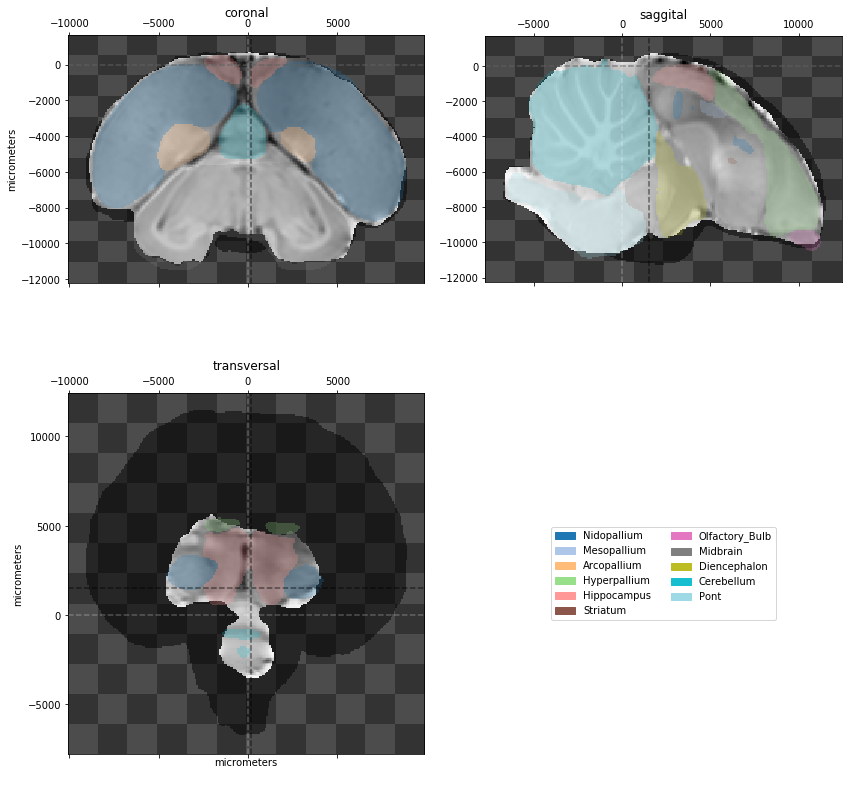

In [9]:
plot_location_coordinates(starling_atlas, updated_y_sinus, "Brainregions", region_alpha = 0.25, zoom =6);